# Para esta Tarea

Utiliza el archivo de ventas de videojuegos  vgsales.csv, disponible en Kaggle, para realizar un análisis exploratorio de datos:

Con lo aprendido hasta el momento, generar un análisis completo de Exploratory Data Analysis (EDA) aplicado al archivo que contenga por lo menos 

- Lectura del archivo, head, tail, sample, describe.  Validación de columnas numéricas para que funcione con todas.  

- Elementos mínimos:

    Totales: 

    1) Total de videojuegos analizados,

    2) total de géneros analizados,

    3) Plataformas analizadas

    Ventas:
    
    1) Total de ventas por año,
    
    2) Juegos más vendidos por año,
    
    3) Plataformas con más ingresos por año. 
    
        - Todos estos números desglosados por ingreso: NA, EU, JP, Otros y el Global
    
    4) Gráfico de comparación de ventas entre géneros por año, 
    
    Insights: 2 Gráficos adicionales interesantes

---

Revisar el EDA del ejercicio anterior y añadir siguientes elementos, basados en los últimos 4 años

Crecimiento:

1) qué género ha tenido el mayor y menor crecimiento,

2) qué plataforma ha tenido el mayor y menor crecimiento,

3) qué videojuego ha tenido el mayor y menor crecimiento

2 elementos adicionales que muestren oportunidades de mercado

---

Por cada ejercicio es necesario realizar el código en Python utilizando la función estudiada.

Generar una presentación en Google Slides de máximo 7 slides, donde se seleccionarán los gráficos y análisis principales.  El formato tendrá máximo 2 gráficos por slide y una explicación de 3-4 líneas, además de una conclusión final.

## Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura del archivo

In [2]:
df = pd.read_csv('../../Archivos-Analisis/files-tarea-m33/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Notaciones rapidas: Cambio de tipo de dato en las siguientes columnas, 

    - Col Year pasar a tipo int, ya que maneja floats, cosa que no debe de ser asi
    - Col Genre, Name, Platform y Publisher pasar a tipo string para mejor manejo de la informacion

In [5]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14030,14032,Jane's Hotel,DS,2010.0,Simulation,Unknown,0.03,0.00,0.0,0.00,0.04
6371,6373,XGIII: Extreme G Racing,PS2,2001.0,Racing,Acclaim Entertainment,0.13,0.10,0.0,0.03,0.27
10134,10136,Power Rangers: Super Legends,DS,2007.0,Action,Disney Interactive Studios,0.08,0.03,0.0,0.01,0.11
8892,8894,DreamWorks Super Star Kartz,Wii,2011.0,Racing,Activision,0.10,0.04,0.0,0.01,0.15
467,468,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,Microsoft Game Studios,2.38,0.32,0.0,0.31,3.00


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.shape

(16598, 11)

## Deteccion de valores nulos

In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# Obtencion de valores que cuenten con datos nulos
df[df.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


### Drop de valores nulos

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Masajeo de datos
De acuerdo a las notas marcadas, procederemos a hacer el masajeo de datos correspondiente para mejorar el analisis

In [14]:
# Col Year pasar a tipo int, ya que maneja floats, cosa que no debe de ser asi
# df['Year'] = df['Year'].astype('string')
df['Year'] = df['Year'].astype('int')

# Col Genre y Publisher pasar a tipo string para mejor manejo de la informacion
df['Genre'] = df['Genre'].astype('string')
df['Publisher'] = df['Publisher'].astype('string')
df['Name'] = df['Name'].astype('string')
df['Platform'] = df['Platform'].astype('string')

In [15]:
# Corroboramos
df.dtypes

Rank                     int64
Name            string[python]
Platform        string[python]
Year                     int64
Genre           string[python]
Publisher       string[python]
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

## Analisis

### Totales

1) Total de videojuegos analizados.

2) total de géneros analizados.

3) Plataformas analizadas.


#### Analisis

In [16]:
# Total de Titulos agrupados por Generos
total_games_gen = df.groupby('Genre')['Genre'].count().rename('Num de Videojuegos')
total_games_gen

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: Num de Videojuegos, dtype: int64

<Axes: ylabel='Genre'>

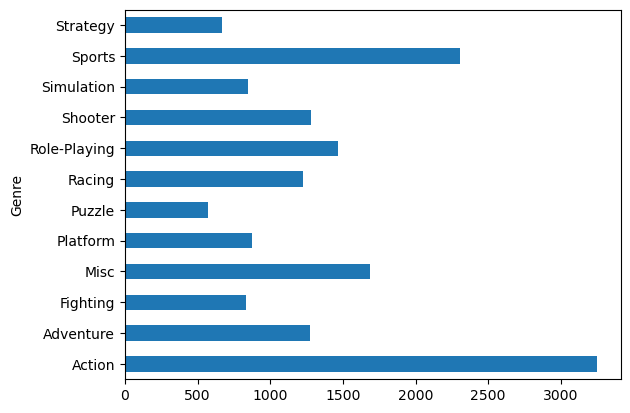

In [17]:
total_games_gen.plot.barh()

In [18]:
# Numero de titulos lanzados por año, agrupados por genero
pvt_total_games_gen = pd.pivot_table(df, values='Name', index='Genre', columns='Year', aggfunc='count', fill_value=0)

pvt_total_games_gen


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,...,272,226,239,265,148,186,255,118,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,...,141,154,108,58,60,75,54,33,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,...,53,40,50,29,20,23,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,...,207,201,184,38,42,41,39,18,0,0
Platform,0,3,5,5,1,4,6,2,4,3,...,29,31,37,11,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,...,79,45,43,11,3,7,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,...,84,57,64,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,...,103,103,95,78,71,90,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,...,91,81,94,48,59,47,34,32,0,0


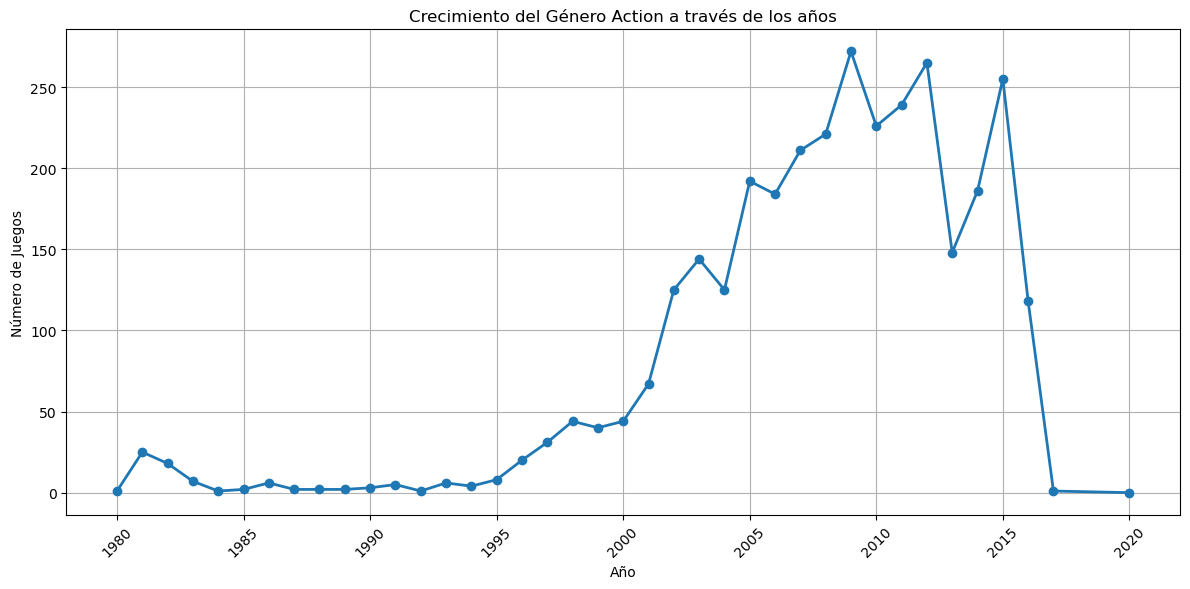

In [19]:
# Grafico del crecimiento del genero Action
plt.figure(figsize=(12, 6))

action_data = pvt_total_games_gen.loc['Action']
plt.plot(action_data.index, action_data.values, marker='o', linewidth=2)

plt.title('Crecimiento del Género Action a través de los años')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

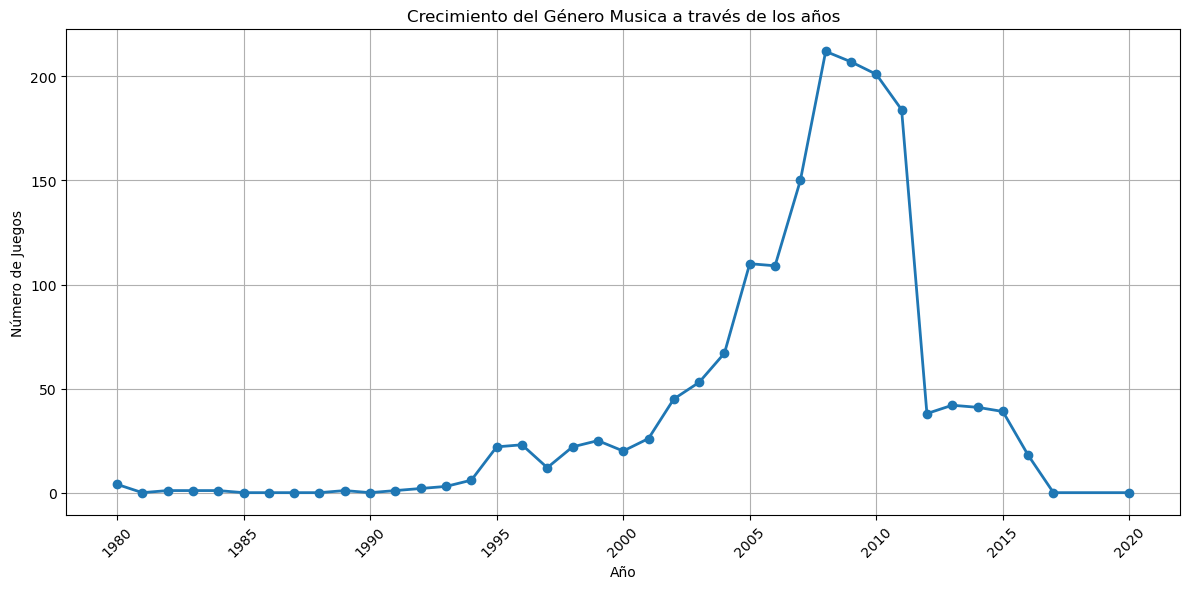

In [ ]:
# Grafico del crecimiento del genero Action
plt.figure(figsize=(12, 6))

action_data = pvt_total_games_gen.loc['Misc']
plt.plot(action_data.index, action_data.values, marker='o', linewidth=2)

plt.title('Crecimiento del Género Misc a través de los años')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [21]:
# Adicion de la columna Total
pvt_total_games_gen_total = pvt_total_games_gen
pvt_total_games_gen_total['Total'] = pvt_total_games_gen.sum(axis=1)
pvt_total_games_gen_total

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,...,226,239,265,148,186,255,118,1,0,3251
Adventure,0,0,0,1,0,0,0,1,0,0,...,154,108,58,60,75,54,33,0,0,1274
Fighting,1,0,0,0,0,1,0,2,0,0,...,40,50,29,20,23,21,14,0,0,836
Misc,4,0,1,1,1,0,0,0,0,1,...,201,184,38,42,41,39,18,0,0,1686
Platform,0,3,5,5,1,4,6,2,4,3,...,31,37,11,37,10,14,10,0,0,875
Puzzle,0,2,3,1,3,4,0,0,1,5,...,45,43,11,3,7,6,0,0,0,570
Racing,0,1,2,0,3,0,1,0,1,0,...,57,64,30,16,27,19,20,0,0,1225
Role-Playing,0,0,0,0,0,0,1,3,3,2,...,103,95,78,71,90,78,40,2,0,1470
Shooter,2,10,5,1,3,1,4,2,1,1,...,81,94,48,59,47,34,32,0,0,1282


In [22]:
# Plataformas mas jugadas
plat_games = df.groupby('Platform')['Platform'].count().sort_values(ascending=False)
plat_games

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

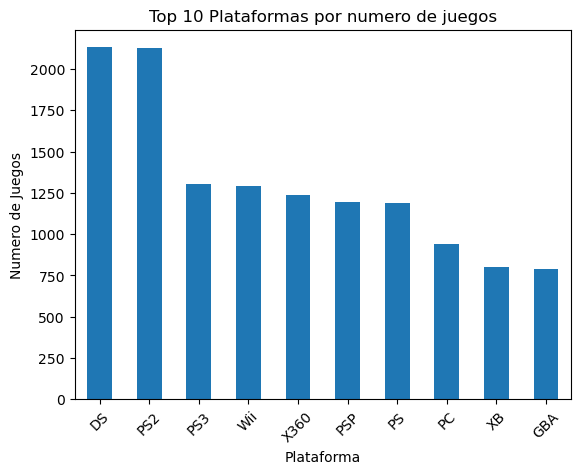

In [23]:
fig, ax1 = plt.subplots()

# Plot 1: Top 10 Plataformas por numero de juegos
plat_games.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 Plataformas por numero de juegos')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Numero de Juegos')
ax1.tick_params(axis='x', rotation=45)

plt.show()

#### Analisis Correlacional

<Axes: xlabel='Genre', ylabel='Genre'>

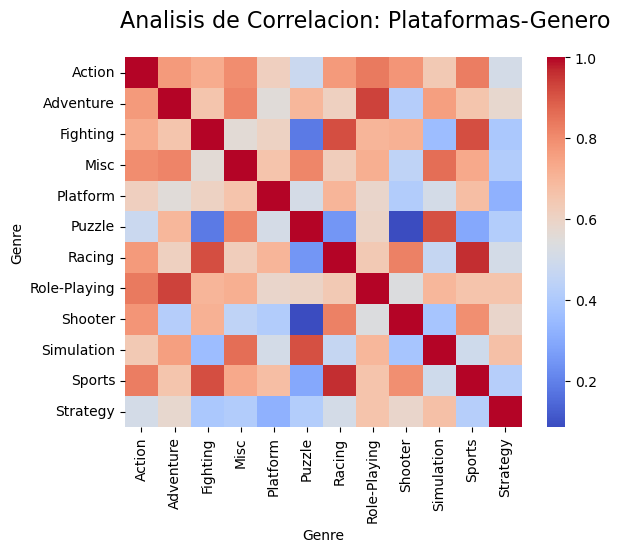

In [24]:
pvt_platform_genre = pd.crosstab(df['Platform'], df['Genre'])


fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Plataformas-Genero', fontsize=16)

sns.heatmap(pvt_platform_genre.corr(), annot=False, cmap='coolwarm')

<Axes: xlabel='Publisher', ylabel='Publisher'>

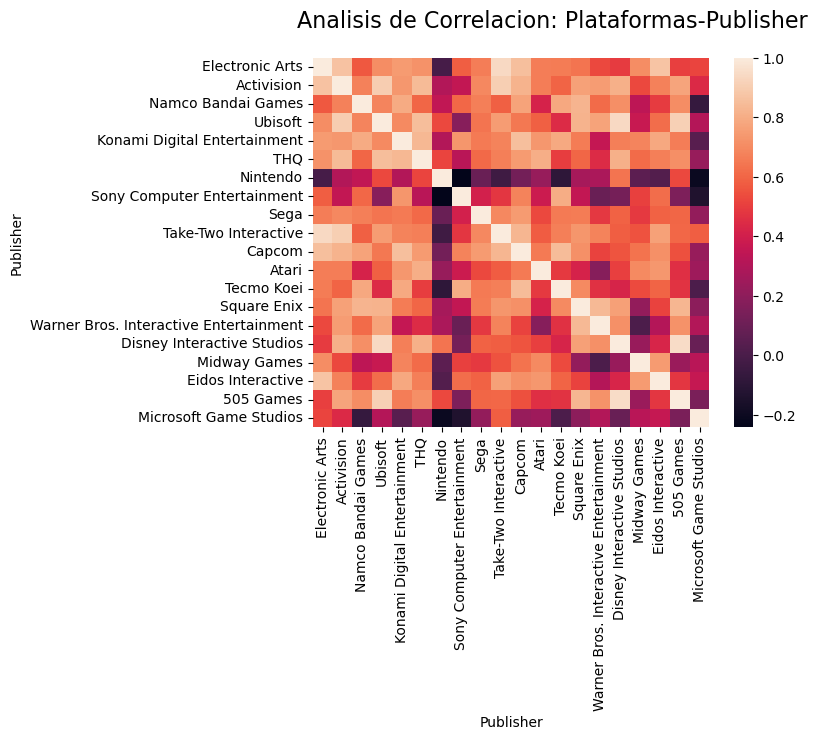

In [25]:
pvt_platform_publisher = pd.crosstab(df['Platform'], df['Publisher'])
fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Plataformas-Publisher', fontsize=16)

top_publishers = df['Publisher'].value_counts().nlargest(20).index
pvt_platform_publisher = pvt_platform_publisher[top_publishers]
sns.heatmap(pvt_platform_publisher.corr())

<Axes: xlabel='Publisher', ylabel='Publisher'>

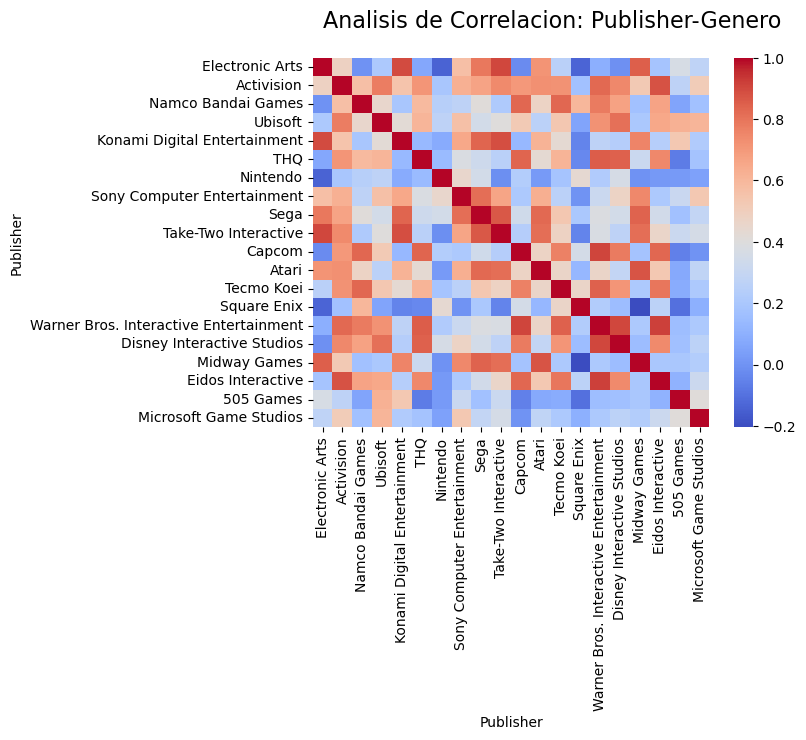

In [26]:
pvt_genre_publisher = pd.crosstab(df['Genre'], df['Publisher'])
fig, axes = plt.subplots()
fig.suptitle('Analisis de Correlacion: Publisher-Genero', fontsize=16)

pvt_genre_publisher = pvt_genre_publisher[top_publishers]
sns.heatmap(pvt_genre_publisher.corr(), annot=False, cmap='coolwarm')


In [ ]:
sns.displot(df['NA_Sales'], kde=False)
sns.displot(df['EU_Sales'], kde=False)
sns.displot(df['JP_Sales'], kde=False)
sns.displot(df['Other_Sales'], kde=False)

#### Analisis Bivariado

In [28]:
# Numero de lanzamientos por generos y plataformas
bi_analyst = pd.crosstab(df['Genre'], df['Platform'])
bi_analyst

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,...,3,0,12,0,0,230,63,318,152,68
Adventure,1,1,36,11,238,5,36,20,2,0,...,26,0,4,1,0,83,3,47,26,12
Fighting,1,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,41,5,65,44,7
Misc,5,0,53,0,389,8,86,35,1,0,...,15,2,17,0,0,272,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,...,5,1,26,0,0,57,16,24,49,4
Puzzle,8,1,19,0,236,15,39,12,0,0,...,5,0,13,0,0,54,4,6,7,0
Racing,4,0,10,6,66,2,64,60,1,0,...,8,1,9,0,0,92,3,102,122,19
Role-Playing,0,0,85,4,196,21,73,25,3,0,...,17,1,50,0,4,35,6,75,23,13
Shooter,22,0,6,3,42,1,40,48,1,0,...,22,0,10,1,0,61,10,197,124,33


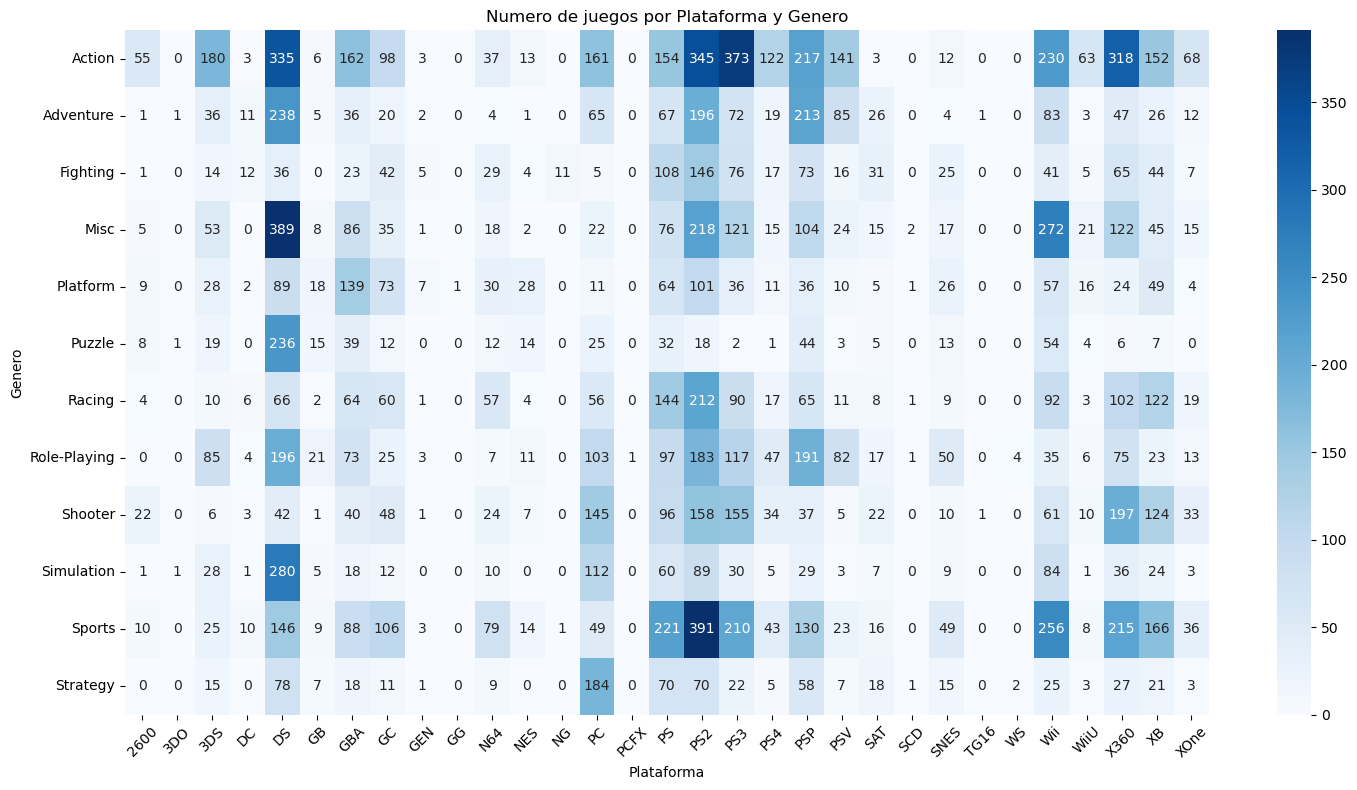

In [29]:
# Grafcio de Numero de juegos por Plataforma y Gener
# Tabla Pivot
pivot_genre_platform_count = pd.pivot_table(df, values='Name', index='Genre', columns='Platform', aggfunc='count', fill_value=0)

# Creacion del heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_genre_platform_count, cmap='Blues', annot=True, fmt='g')
plt.title('Numero de juegos por Plataforma y Genero')
plt.xlabel('Plataforma')
plt.ylabel('Genero')
plt.xticks(rotation=45)
plt.tight_layout()

#### Insigths
- Los videojuegos de acction han sido de los mas lanzados y jugados
- Siendo los de puzzle los menos lanzados
- La PS2 fue una de las consolas con mayor rango de crecimiento de su epoca, siendo unicamente alcanzada por la Wii unos año despues
- La plataforma de PC tuve un aumento en sus jugadores desde el año de 2007
- La Nintendo DS y PS2, son de las platafromas con mas juegos lanzados

### Ventas
1) Total de ventas por año,
    
2) Juegos más vendidos por año,
    
3) Plataformas con más ingresos por año. 
    - Todos estos números desglosados por ingreso: NA, EU, JP, Otros y el Global
    
4) Gráfico de comparación de ventas entre géneros por año, 

#### Analisis

##### Total de ventas por año

In [30]:
total_sales = df.groupby('Year')['Global_Sales'].sum().round(2)
total_sales

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

In [31]:
# Tabla pivot de las ventas por año por publisher
pvt_total_sales = pd.pivot_table(df, values='Global_Sales', index='Publisher', columns='Year', aggfunc='sum', fill_value=0).round(2)
pvt_total_sales

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Publisher,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
1C Company,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.09,0.0,0.0,0.00,0.00,0.0,0.0,0.0
20th Century Fox Video Games,0.0,1.35,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2D Boy,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
3DO,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0
imageepoch Inc.,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.04,0.00,0.0,0.0,0.0
inXile Entertainment,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.10,0.0,0.0,0.0


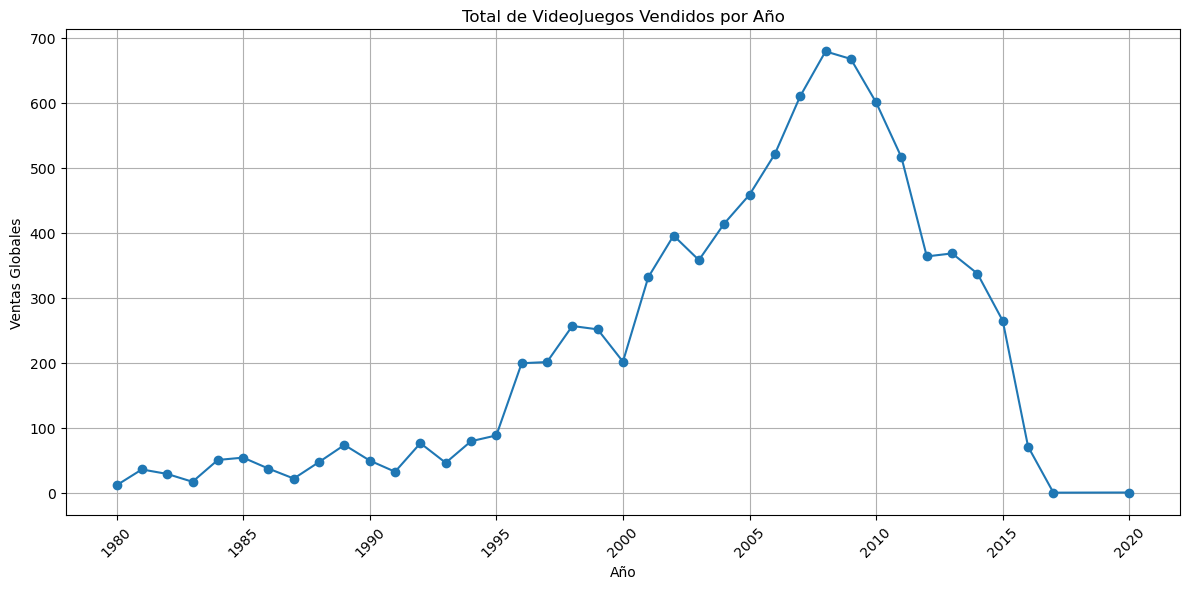

In [32]:
plt.figure(figsize=(12, 6))
total_sales.plot(kind='line', marker='o')
plt.title('Total de VideoJuegos Vendidos por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

##### Videojuegos mas vendidos

In [33]:
# Tabla pivot de videojuegos mas vendidos por año
pvt_game_salesXyear = pd.pivot_table(df, values='Global_Sales', index='Name', columns='Year', aggfunc='sum', fill_value=0).round(2)

# Agregamos la columna total
pvt_game_salesXyear['Total'] = pvt_game_salesXyear.sum(axis=1)


pvt_game_salesXyear

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Name,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41
.hack//G.U. Vol.1//Rebirth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17
.hack//G.U. Vol.2//Reminisce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16
.hack//G.U. Vol.3//Redemption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thinkSMART FAMILY!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03
thinkSMART: Chess for Kids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
uDraw Studio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.46,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.46


In [34]:
# Top 10 Titulos mas comprados
top_10_games_sales = pvt_game_salesXyear.sort_values('Total', ascending=False)
top_10_games_sales.head(10)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,82.74
Grand Theft Auto V,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,37.78,17.06,1.08,0.0,0.0,0.0,55.92
Super Mario Bros.,0.0,0.0,0.0,0.0,0.0,40.24,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,45.31
Tetris,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,5.58,30.26,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,35.84
Mario Kart Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,35.82
Wii Sports Resort,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,33.00
Pokemon Red/Pokemon Blue,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,31.37
Call of Duty: Modern Warfare 3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,30.83,0.00,0.00,0.00,0.00,0.0,0.0,0.0,30.83
New Super Mario Bros.,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,30.01


In [37]:
top_10_games_sales_plot = top_10_games_sales['Total']
top_10_games_sales_plot

Name
Wii Sports                                                     82.74
Grand Theft Auto V                                             55.92
Super Mario Bros.                                              45.31
Tetris                                                         35.84
Mario Kart Wii                                                 35.82
                                                               ...  
WinBack 2: Project Poseidon                                     0.01
Sengoku Hime 2 Arashi: Hyakubana Senran Tatsukaze no Gotoku     0.01
Starry ? Sky: After Autumn                                      0.01
Jam Sessions: Sing and Play Guitar (jp sales)                   0.01
Fatal Fury: Battle Archives Volume 1 (JP sales)                 0.01
Name: Total, Length: 11325, dtype: float64

##### Ingresos x Plataformas

In [51]:
# Tabla pivot de ingresos por plataforma
platform_sales = pd.pivot_table(df, values='Global_Sales', index='Platform',columns='Year',aggfunc='sum').fillna(0).round(2)
platform_sales

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.77,28.86,5.83,0.27,0.45,0.66,1.98,0.75,0.62,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,62.53,51.14,55.88,43.13,26.99,6.60,0.00,0.00
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,121.99,87.98,27.80,11.59,1.96,0.02,0.00,0.00,0.00,0.29
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.98,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
# Ingresos totales
platform_sales_total = platform_sales.sum(axis=1).sort_values(ascending=False).round(2)
platform_sales_total

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

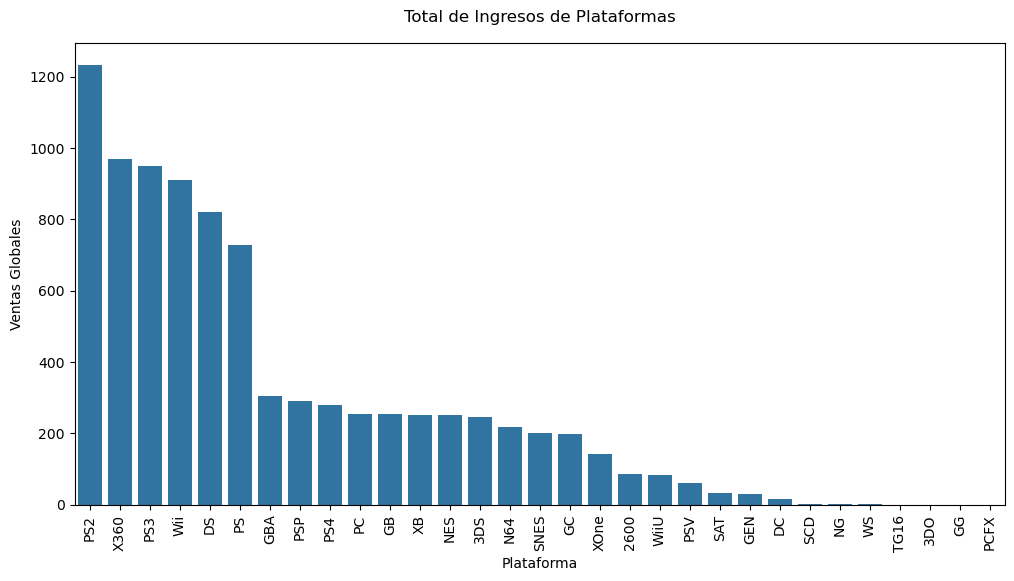

In [53]:
plt.figure(figsize=(12, 6))

sns.barplot(x=platform_sales_total.index, y=platform_sales_total.values)

plt.title('Total de Ingresos de Plataformas', pad=15)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')

plt.xticks(rotation=90)
plt.show()

C:\Users\RyanHz\AppData\Local\Temp\ipykernel_12580\2824617820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_platforms.index, y=top_10_platforms.values, palette='viridis')


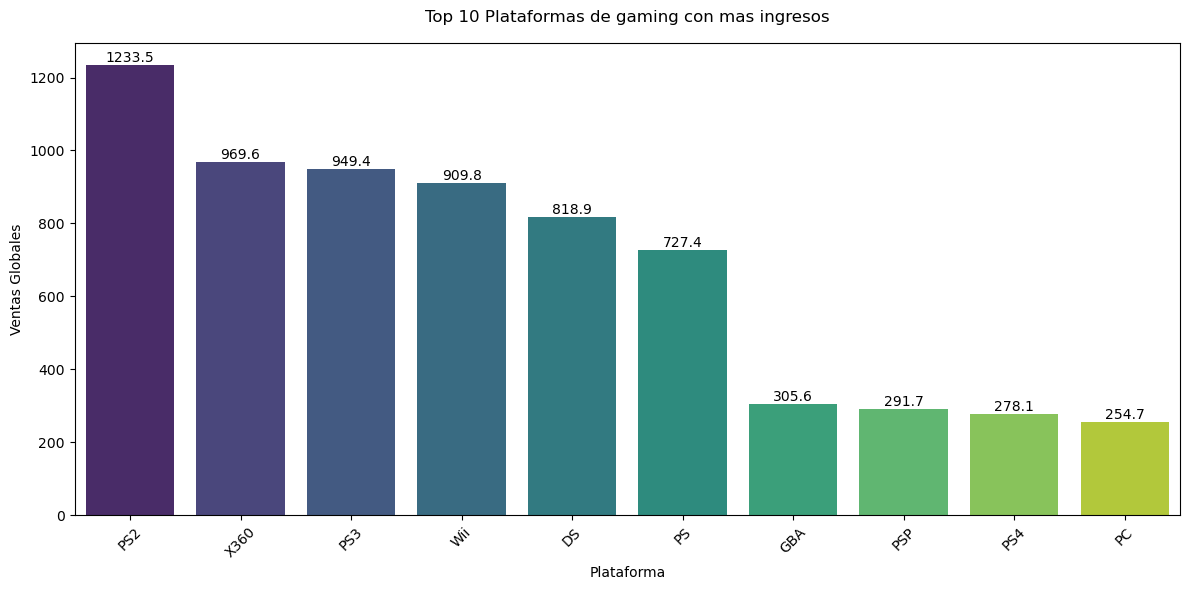

In [84]:
# Grafico de las plataformas con mas ingresos totales
plt.figure(figsize=(12, 6))

sns.barplot(x=top_10_platforms.index, y=top_10_platforms.values, palette='viridis')

plt.title('Top 10 Plataformas de gaming con mas ingresos', pad=15)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')

plt.xticks(rotation=45)

for i, v in enumerate(top_10_platforms):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()

##### Desglose por region

In [55]:
sales_x_region_na = pd.pivot_table(df, values=['NA_Sales', 'Global_Sales'],index='Platform',aggfunc='sum').round(2)

sales_x_region_na = sales_x_region_na.sort_values('Global_Sales', ascending=False)

sales_x_region_na

,Global_Sales,NA_Sales
Platform,,
PS2,1233.46,572.92
X360,969.60,594.33
PS3,949.35,388.90
Wii,909.81,497.37
DS,818.91,388.53
PS,727.39,334.71
GBA,305.62,178.43
PSP,291.71,107.09
PS4,278.10,96.80


<Figure size 1200x600 with 0 Axes>

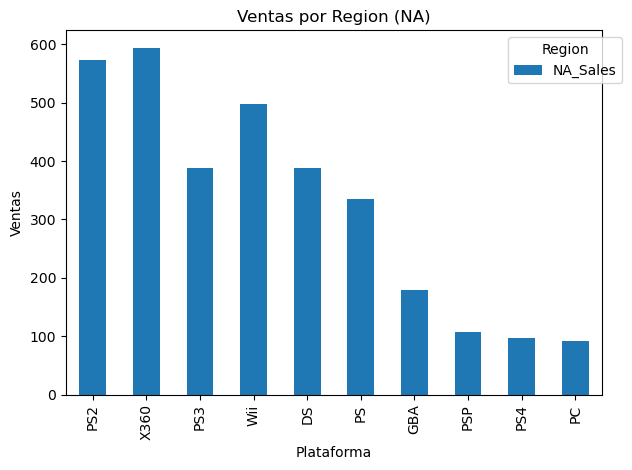

In [58]:
plt.figure(figsize=(12, 6))

sales_x_region_na[['NA_Sales']].head(10).plot(kind='bar', stacked=True)

plt.title('Ventas por Region (NA)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [59]:
sales_x_region_eu = pd.pivot_table(df, values=['EU_Sales', 'Global_Sales'],index='Platform',aggfunc='sum').round(2)

sales_x_region_eu = sales_x_region_eu.sort_values('Global_Sales', ascending=False)

sales_x_region_eu

,EU_Sales,Global_Sales
Platform,,
PS2,332.63,1233.46
X360,278.00,969.60
PS3,340.47,949.35
Wii,264.35,909.81
DS,194.05,818.91
PS,212.38,727.39
GBA,72.49,305.62
PSP,67.16,291.71
PS4,123.70,278.10


<Figure size 1200x600 with 0 Axes>

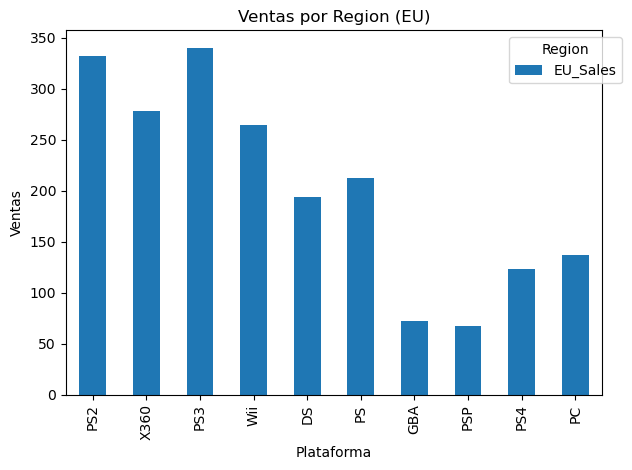

In [60]:
plt.figure(figsize=(12, 6))

sales_x_region_eu[['EU_Sales']].head(10).plot(kind='bar', stacked=True)

plt.title('Ventas por Region (EU)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [61]:
sales_x_region_jp = pd.pivot_table(df, values=['JP_Sales', 'Global_Sales'],index='Platform',aggfunc='sum').round(2)

sales_x_region_jp = sales_x_region_jp.sort_values('Global_Sales', ascending=False)

sales_x_region_jp

,Global_Sales,JP_Sales
Platform,,
PS2,1233.46,137.54
X360,969.60,12.30
PS3,949.35,79.21
Wii,909.81,68.28
DS,818.91,175.02
PS,727.39,139.78
GBA,305.62,46.56
PSP,291.71,75.89
PS4,278.10,14.30


<Figure size 1200x600 with 0 Axes>

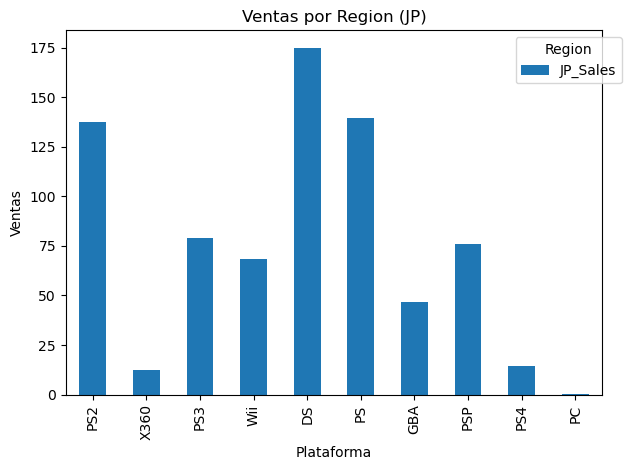

In [62]:
plt.figure(figsize=(12, 6))

sales_x_region_jp[['JP_Sales']].head(10).plot(kind='bar', stacked=True)

plt.title('Ventas por Region (JP)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [63]:
sales_x_region_ot = pd.pivot_table(df, values=['Other_Sales', 'Global_Sales'],index='Platform',aggfunc='sum').round(2)

sales_x_region_ot = sales_x_region_ot.sort_values('Global_Sales', ascending=False)

sales_x_region_ot

,Global_Sales,Other_Sales
Platform,,
PS2,1233.46,190.47
X360,969.60,84.67
PS3,949.35,140.81
Wii,909.81,79.20
DS,818.91,60.29
PS,727.39,40.69
GBA,305.62,7.51
PSP,291.71,41.52
PS4,278.10,43.36


<Figure size 1200x600 with 0 Axes>

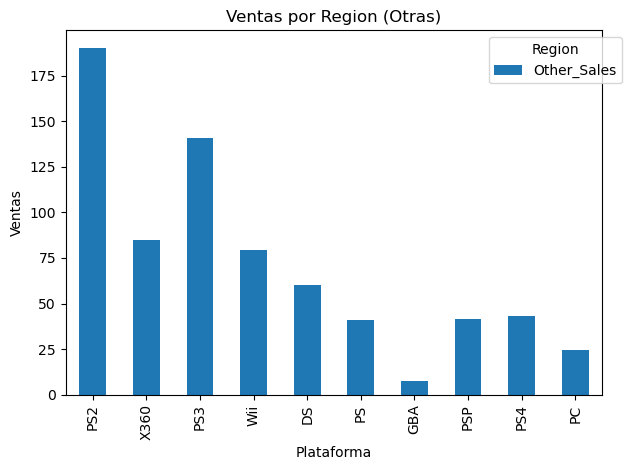

In [64]:
plt.figure(figsize=(12, 6))

sales_x_region_ot[['Other_Sales']].head(10).plot(kind='bar', stacked=True)

plt.title('Ventas por Region (Otras)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [65]:
# Tabla pivot de ventas por region
sales_x_region = pd.pivot_table(df, values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],index='Platform',aggfunc='sum').round(2)

sales_x_region = sales_x_region.sort_values('Global_Sales', ascending=False)
sales_x_region

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Platform,,,,,
PS2,332.63,1233.46,137.54,572.92,190.47
X360,278.00,969.60,12.30,594.33,84.67
PS3,340.47,949.35,79.21,388.90,140.81
Wii,264.35,909.81,68.28,497.37,79.20
DS,194.05,818.91,175.02,388.53,60.29
PS,212.38,727.39,139.78,334.71,40.69
GBA,72.49,305.62,46.56,178.43,7.51
PSP,67.16,291.71,75.89,107.09,41.52
PS4,123.70,278.10,14.30,96.80,43.36


<Figure size 1200x600 with 0 Axes>

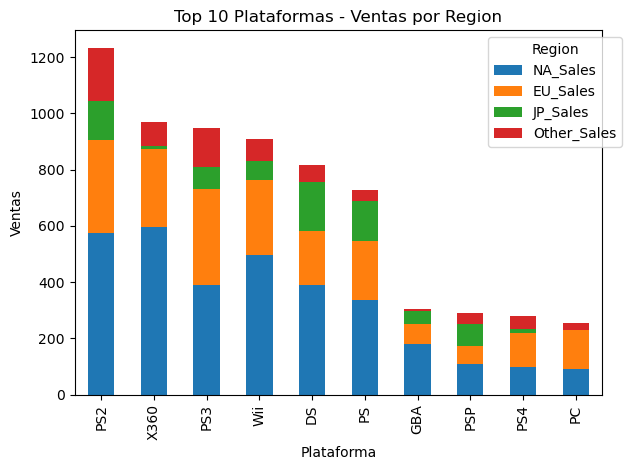

In [66]:
# Grafico Desglosado de ventas por region
plt.figure(figsize=(12, 6))

sales_x_region[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].head(10).plot(kind='bar', stacked=True)

plt.title('Top 10 Plataformas - Ventas por Region')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

##### Grafico de comparación de ventas entre generos por año

In [67]:
# Creacion de tabla pivot de ventas por genro y año
genre_sales_x_year = pd.pivot_table(df, values='Global_Sales', index='Genre', columns='Year', aggfunc='sum', fill_value=0).round(2)
genre_sales_x_year


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.34,14.84,6.52,2.86,1.85,3.52,13.74,1.12,1.75,4.64,...,139.36,117.64,118.96,122.01,125.22,99.02,70.70,19.90,0.01,0.00
Adventure,0.00,0.00,0.00,0.40,0.00,0.00,0.00,4.38,0.00,0.00,...,20.68,16.57,15.98,5.99,6.61,6.06,8.03,1.79,0.00,0.00
Fighting,0.77,0.00,0.00,0.00,0.00,1.05,0.00,5.42,0.00,0.00,...,32.15,14.89,22.68,9.51,7.21,16.15,7.78,3.86,0.00,0.00
Misc,2.71,0.00,0.87,2.14,1.45,0.00,0.00,0.00,0.00,1.28,...,76.94,96.86,56.08,22.92,25.65,23.68,11.69,1.17,0.00,0.00
Platform,0.00,6.93,5.03,6.93,0.69,43.17,9.39,1.74,27.73,20.66,...,41.09,31.90,28.11,18.53,25.12,8.89,6.05,2.07,0.00,0.00
Puzzle,0.00,2.24,10.03,0.78,3.14,3.21,0.00,0.00,5.58,37.75,...,20.31,11.18,5.11,1.76,0.99,1.49,0.70,0.00,0.00,0.00
Racing,0.00,0.48,1.57,0.00,5.95,0.00,1.96,0.00,2.14,0.00,...,34.19,34.93,35.00,14.46,13.04,16.69,7.92,1.64,0.00,0.00
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,2.52,4.65,5.88,2.20,...,47.90,70.52,53.37,47.81,44.92,45.85,36.44,6.76,0.04,0.00
Shooter,7.07,10.04,3.79,0.48,31.10,1.00,3.89,0.71,0.51,1.20,...,69.89,77.41,99.36,72.86,62.80,66.00,66.15,18.22,0.00,0.00


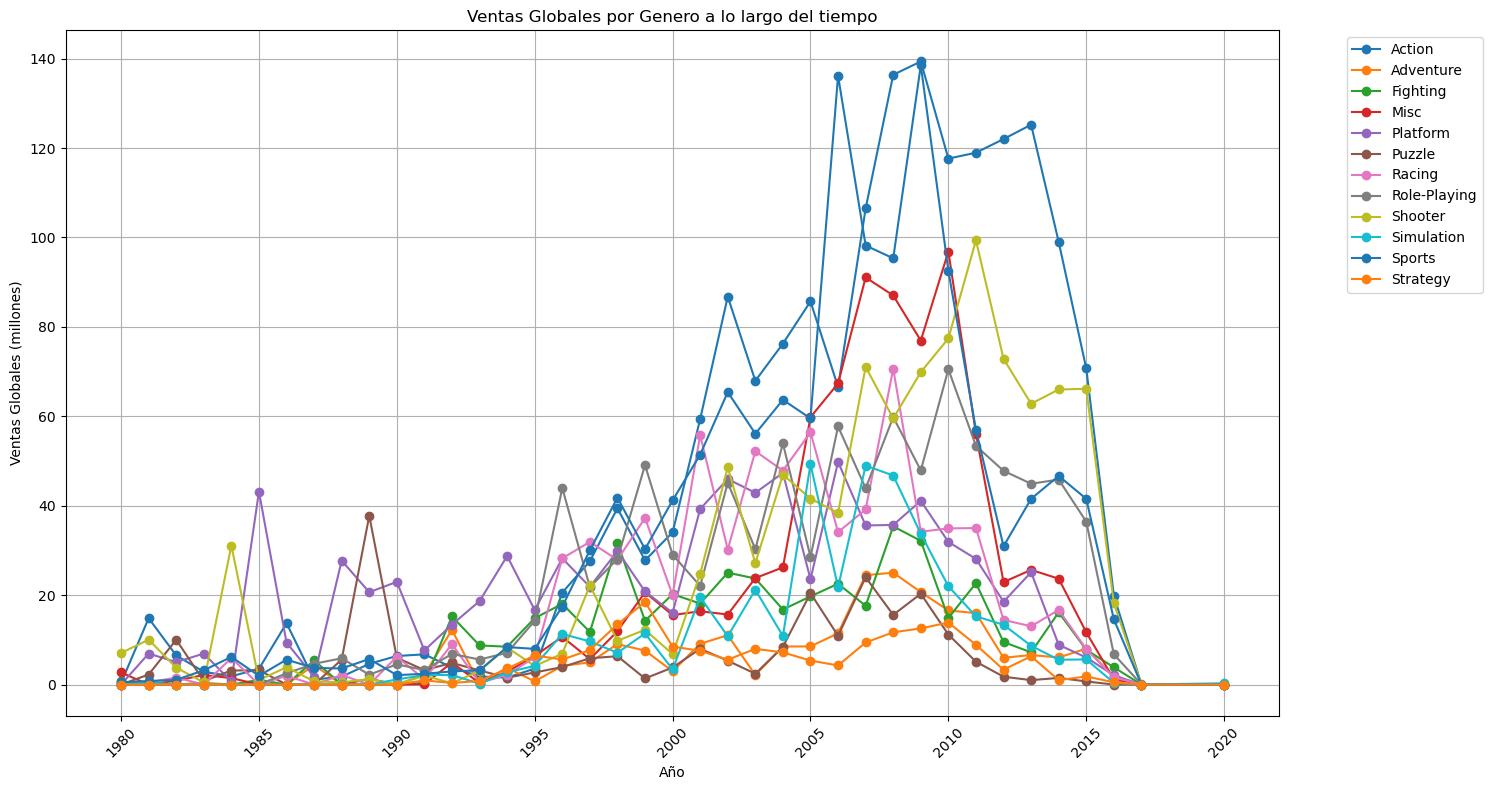

In [68]:
plt.figure(figsize=(15, 8))

# Plots argumentales para cada género.
for genre in genre_sales_x_year.index:
    plt.plot(genre_sales_x_year.columns, genre_sales_x_year.loc[genre], label=genre, marker='o')

plt.title('Ventas Globales por Genero a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()

#### Analisis Correlacional

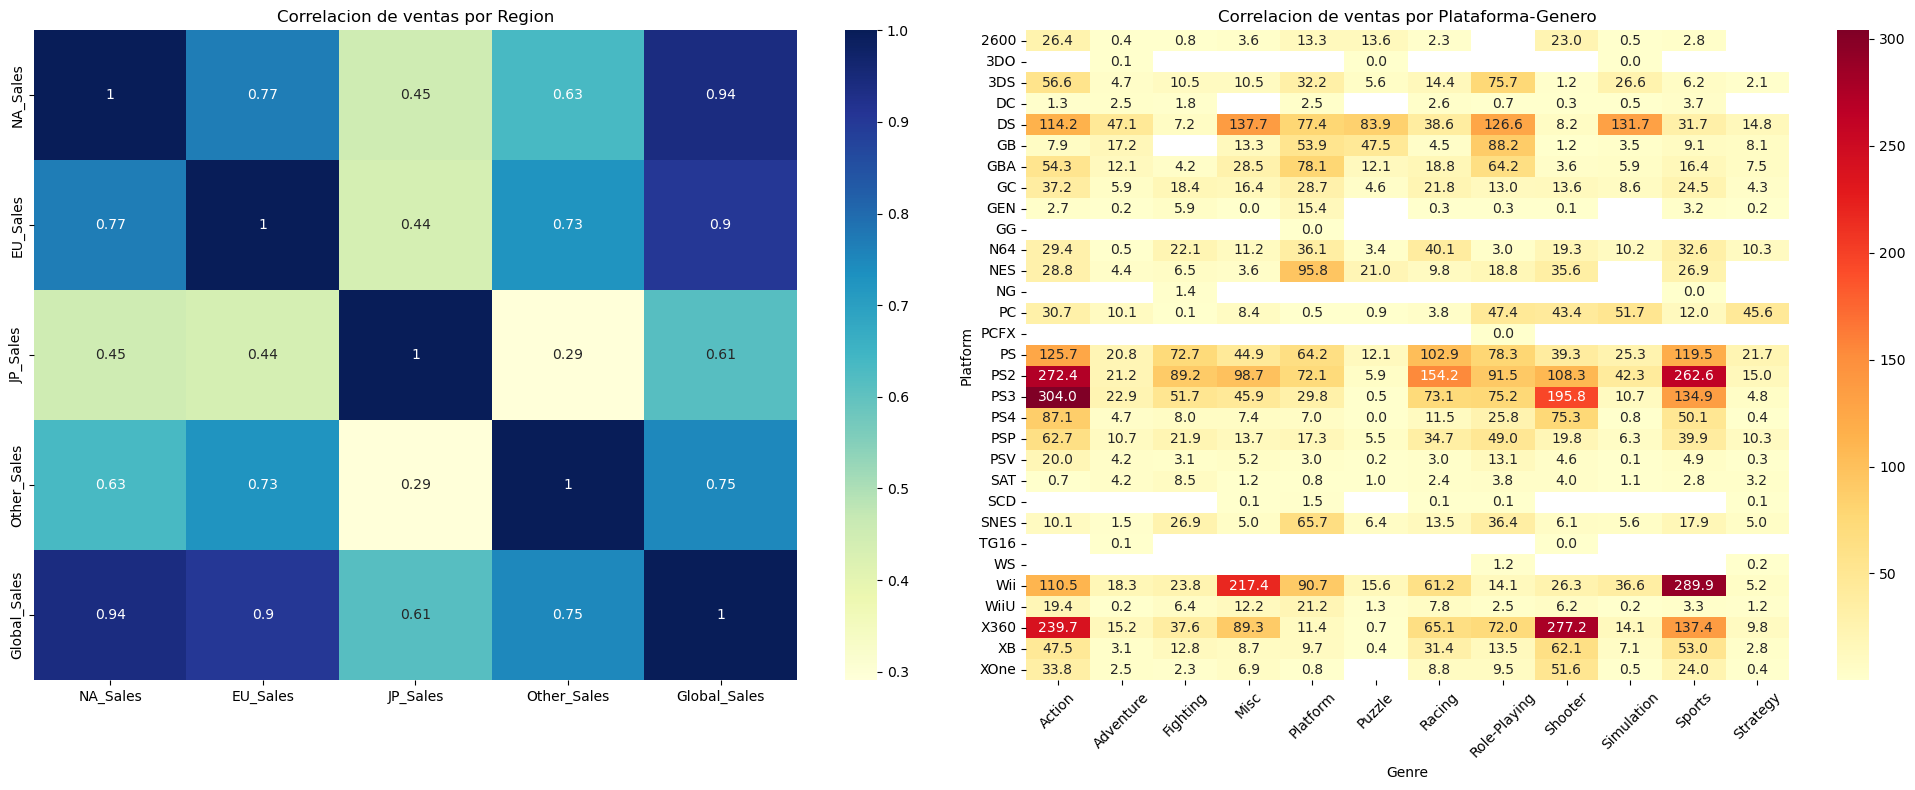

In [69]:
# 1. Ventas Correlacionales por Region
sales_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# 2. Correlacion de Plataforma de genero basado en las ventas
platform_genre_sales = pd.pivot_table(df, values='Global_Sales', index='Platform', columns='Genre', aggfunc='sum')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Grafico de calor de ventas por region
sns.heatmap(sales_corr, annot=True, cmap='YlGnBu', ax=ax1)
ax1.set_title('Correlacion de ventas por Region')

# Grafico de calor de pltaformas-genero por ventas
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Correlacion de ventas por Plataforma-Genero')
plt.xticks(rotation=45)

plt.tight_layout()

#### Analisis Bivariado

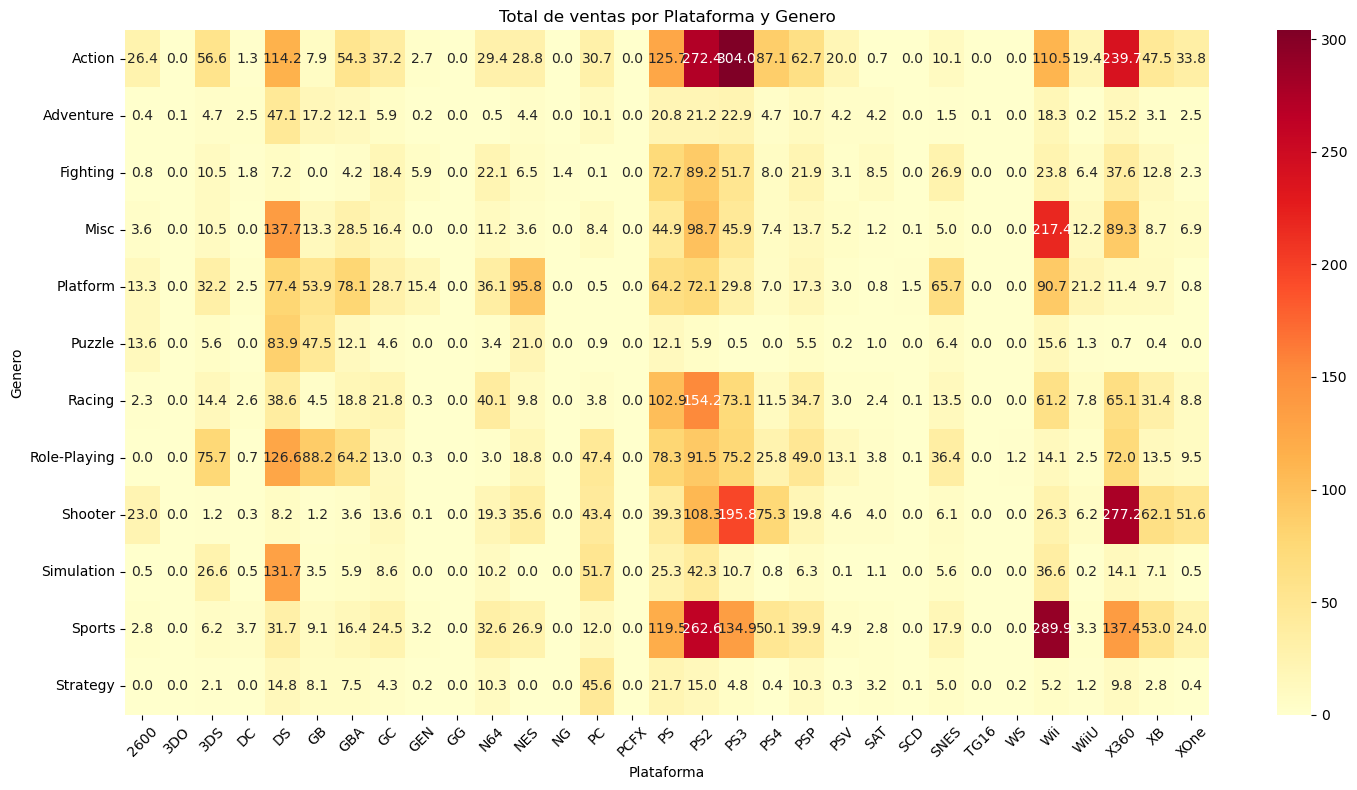

In [70]:
# Grafico de VEntas totales por plataforma y Genero
# Tabla pivot
pivot_genre_platform = pd.pivot_table(df, values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum',fill_value=0)

# Creacion de heat,ap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_genre_platform, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Total de ventas por Plataforma y Genero')
plt.xlabel('Plataforma')
plt.ylabel('Genero')
plt.xticks(rotation=45)
plt.tight_layout()

#### Insigths
- Las mayores ventas registradas son del año 2005 al 2017 
- Las plataformas de sobremesa, prefierentitulos mas de accion o deportes
- La region NA es la que mayor ingresos registra
- PS2 y X360 son las plataformas con mas ingresos registrados hasta el 2020
- El videojuego de Wii sports es el que mas ventas registradas tiene sin diferencia

### Lanzamientos por Publisher
1) Numero total de lanzamientos por Publisher

2) Ventas totales por Publisher

3) Numero de lanzamientos por año

In [71]:
# Numero de Videojuegos lanzados poir publisher
num_lanzamientos = df.groupby('Publisher')['Publisher'].count().rename('Num de Lanzamientos')
num_lanzamientos

Publisher
10TACLE Studios                  3
1C Company                       3
20th Century Fox Video Games     5
2D Boy                           1
3DO                             36
                                ..
id Software                      1
imageepoch Inc.                  2
inXile Entertainment             1
mixi, Inc                        1
responDESIGN                     2
Name: Num de Lanzamientos, Length: 576, dtype: int64

In [72]:
# Publishers con mas lanzamientos
num_lanzamientos.sort_values(ascending=False).head(10)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Num de Lanzamientos, dtype: int64

<Axes: xlabel='Publisher'>

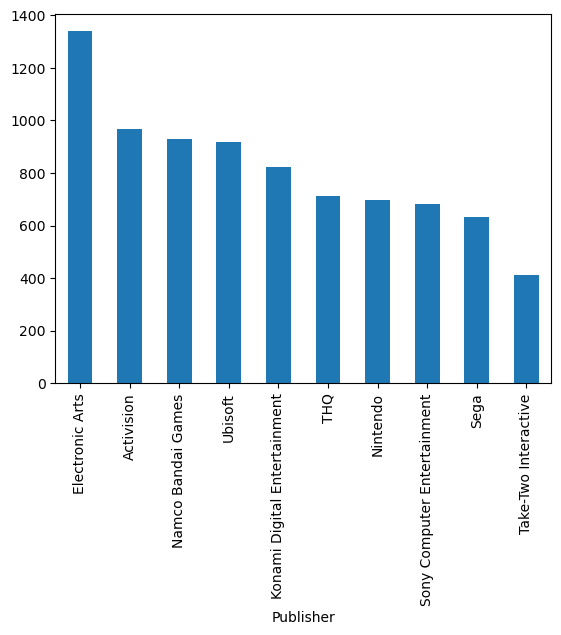

In [73]:
num_lanzamientos.sort_values(ascending=False).head(10).plot.bar()

In [74]:
# Numero de ventas globales por Publisher
sales_publ = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).round(2)
sales_publ.head(10)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

<Axes: xlabel='Publisher'>

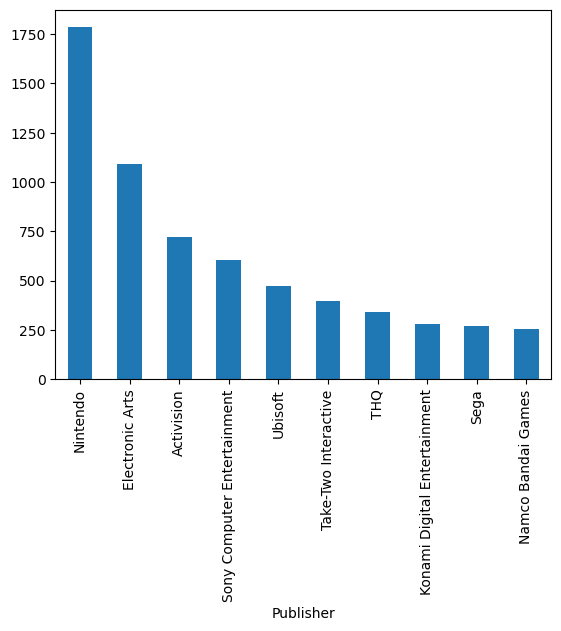

In [75]:
sales_publ.head(10).plot.bar()

In [76]:
# Numero de lanzamientos por año
year_publ = pd.pivot_table(df, values='Name', index='Publisher', columns='Year', aggfunc='count', fill_value=0)

year_publ['Total'] = year_publ.sum(axis=1)
year_publ = year_publ.sort_values('Total', ascending=False)

year_publ.head(10)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total
Publisher,,,,,,,,,,,,,,,,,,,,,
Electronic Arts,0,0,0,0,0,0,0,0,0,0,...,88,76,46,42,36,32,20,0,0,1339
Activision,5,6,4,3,1,2,0,2,2,1,...,89,75,42,38,42,39,14,0,0,966
Namco Bandai Games,0,0,0,0,3,2,2,2,2,1,...,70,76,85,63,69,68,40,0,0,928
Ubisoft,0,0,0,0,0,0,0,0,0,0,...,72,87,32,29,44,32,13,0,1,918
Konami Digital Entertainment,0,0,0,0,0,0,4,1,0,1,...,68,44,32,16,18,12,8,0,0,823
THQ,0,0,0,0,0,0,0,0,0,0,...,57,76,8,1,0,0,0,0,0,712
Nintendo,0,0,0,6,9,7,6,4,6,9,...,28,26,31,23,20,32,10,0,0,696
Sony Computer Entertainment,0,0,0,0,0,0,0,0,0,0,...,43,36,24,12,13,10,5,0,0,682
Sega,0,0,1,0,0,0,0,0,0,0,...,39,35,25,17,23,10,8,2,0,632


<Axes: xlabel='Publisher'>

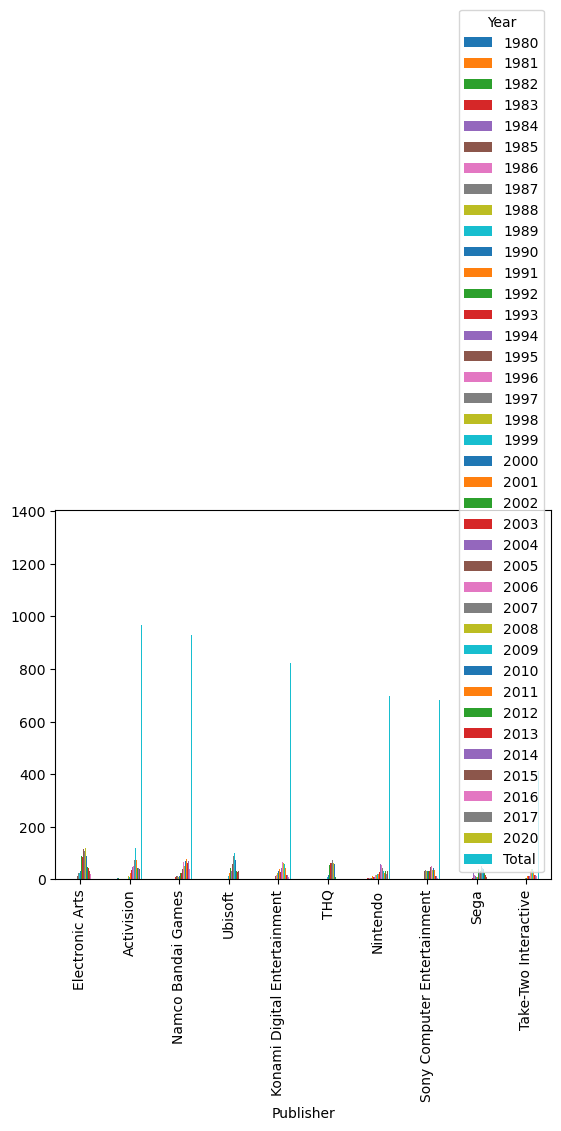

In [77]:
year_publ.head(10).plot.bar()

#### Insigths

- Entre el año 2008 y 2009, fue donde mas lanzamientos se realizaron por parte de todos los publisher
- Siendo Electronic Arts(EA), la mayor publisher antes las demas, con un total de 1339, desde el año de 1980 al 2020

## Graficos adicionales

In [78]:
# Creacion de la tabla pivot de las plataformas con mayor crecimiento
platform_sales = pd.pivot_table(df, values='Global_Sales', index='Platform',columns='Year',aggfunc='sum')

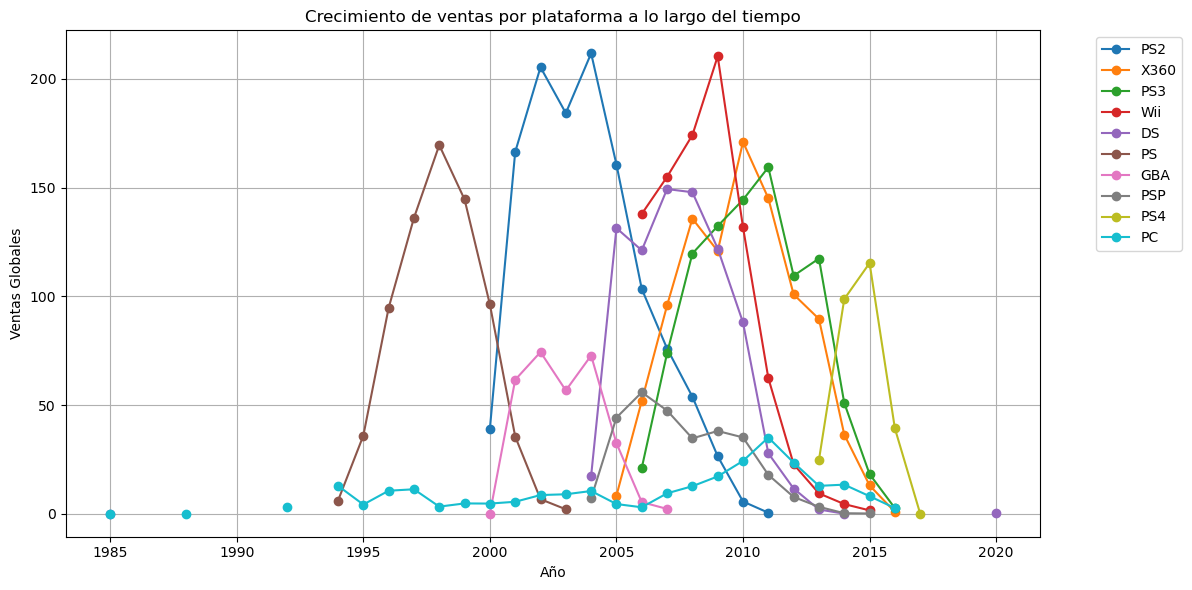

In [82]:
# Calculo total por ventas
platform_total = platform_sales.sum(axis=1).sort_values(ascending=False)

# Obtenemos el top 10 de plataformas por ventas
top_10_platforms = platform_total.head(10)

# Creamos el plot line
plt.figure(figsize=(12, 6))
for platform in top_10_platforms.index:
    plt.plot(platform_sales.columns, platform_sales.loc[platform], label=platform, marker='o')

plt.title('Crecimiento de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

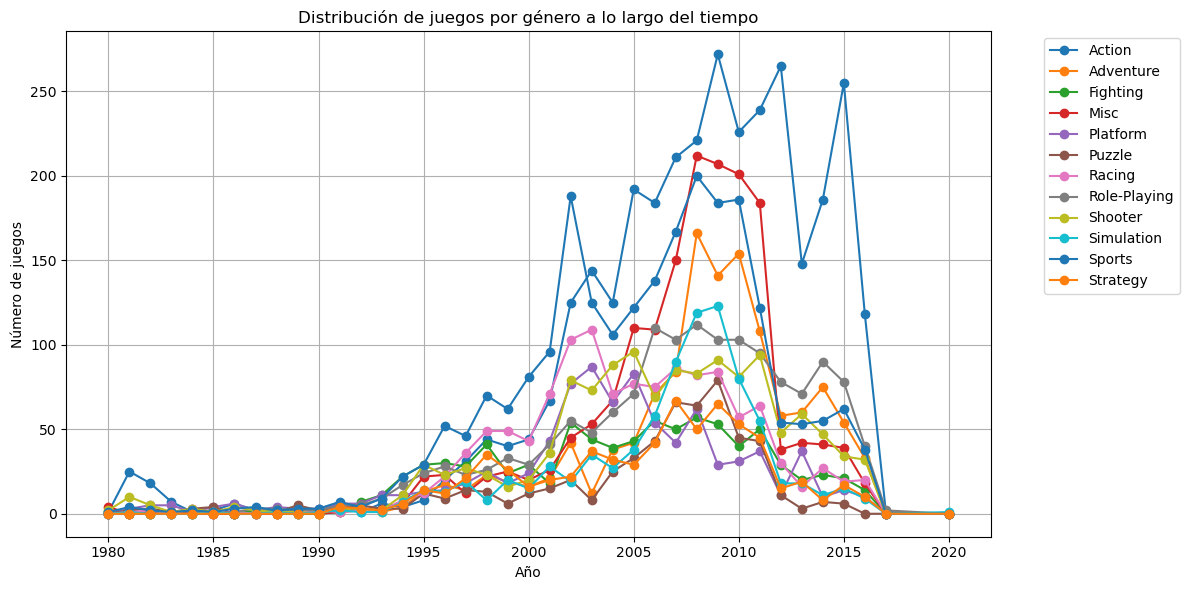

In [ ]:
# Grafico de los generos con mayor crecimiento
plt.figure(figsize=(12, 6))

# Excluimos ela columna Total
plot_data = pvt_total_games_gen.drop('Total', axis=1) if 'Total' in pvt_total_games_gen.columns else pvt_total_games_gen

for genre in total_games_gen.index:
    plt.plot(plot_data.columns, plot_data.loc[genre], label=genre, marker='o')

plt.title('Distribución de juegos por género a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

## Crecimiento

1) qué género ha tenido el mayor y menor crecimiento,

2) qué plataforma ha tenido el mayor y menor crecimiento,

3) qué videojuego ha tenido el mayor y menor crecimiento

2 elementos adicionales que muestren oportunidades de mercado

### Crecimiento en Generos

De acuerdo a la informacion recopilada, el csv no cuenta con los datos suficientes desde el año 2017/2018, por ende, para esta caso, se estaran tomando los años 2013 al 2016

In [87]:
# Tabla del 2017 al 2020
last_4_years = df[df['Year'].isin([2017, 2018, 2019, 2020])]
genre_growth = pd.pivot_table(last_4_years, values='Global_Sales', index='Genre',columns='Year',aggfunc='sum',fill_value=0).round(2)

df_gro_err = genre_growth[list(genre_growth.columns)[0:]].pct_change().round(2).fillna(0)
df_gro_err

Year,2017,2020
Genre,,
Action,0.0,0.0
Role-Playing,3.0,0.0
Simulation,-1.0,inf


In [88]:
# Tabla del 2013 al 2016
last_4_years = df[df['Year'].isin([2013, 2014, 2015, 2016])]
genre_gro = pd.pivot_table(last_4_years, values='Global_Sales', index='Genre',columns='Year',aggfunc='sum',fill_value=0).round(2)

df_gro = genre_gro[list(genre_gro.columns)[0:]].pct_change().round(2).fillna(0)
df_gro

Year,2013,2014,2015,2016
Genre,,,,
Action,0.00,0.00,0.00,0.00
Adventure,-0.95,-0.94,-0.89,-0.91
Fighting,0.09,1.67,-0.03,1.16
Misc,2.56,0.47,0.50,-0.70
Platform,-0.02,-0.62,-0.48,0.77
Puzzle,-0.96,-0.83,-0.88,-1.00
Racing,12.17,10.20,10.31,inf
Role-Playing,2.44,1.75,3.60,3.12
Shooter,0.40,0.44,0.82,1.70


In [89]:
df_gro.style.background_gradient(cmap='Blues')

c:\Users\RyanHz\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3811: RuntimeWarning: invalid value encountered in scalar multiply
  norm = _matplotlib.colors.Normalize(smin - (rng * low), smax + (rng * high))


Year,2013,2014,2015,2016
Genre,,,,
Action,0.000000,0.000000,0.000000,0.000000
Adventure,-0.950000,-0.940000,-0.890000,-0.910000
Fighting,0.090000,1.670000,-0.030000,1.160000
Misc,2.560000,0.470000,0.500000,-0.700000
Platform,-0.020000,-0.620000,-0.480000,0.770000
Puzzle,-0.960000,-0.830000,-0.880000,-1.000000
Racing,12.170000,10.200000,10.310000,inf
Role-Playing,2.440000,1.750000,3.600000,3.120000
Shooter,0.400000,0.440000,0.820000,1.700000


El genero con mayor crecimiento ha sido Racing junto con Sports

### Crecimiento en Plataformas

In [90]:
l4y_platf = df[df['Year'].isin([2013, 2014, 2015, 2016])]
platf_gro = pd.pivot_table(l4y_platf, values='Global_Sales', index='Platform',columns='Year',aggfunc='sum',fill_value=0).round(2)

df_paltf_gro = platf_gro[list(platf_gro.columns)[0:]].pct_change().round(2).fillna(0)
df_paltf_gro

Year,2013,2014,2015,2016
Platform,,,,
3DS,0.00,0.00,0.00,0.00
DS,-0.96,-1.00,-1.00,-1.00
PC,5.55,668.50,inf,inf
PS3,8.15,2.81,1.26,-0.00
PS4,-0.79,0.94,5.33,14.15
PSP,-0.87,-1.00,-1.00,-1.00
PSV,2.98,60.42,58.17,inf
Wii,-0.26,-0.70,-0.78,-1.00
WiiU,1.33,4.07,9.57,inf


In [91]:
df_paltf_gro.style.background_gradient(cmap='Blues')

c:\Users\RyanHz\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3811: RuntimeWarning: invalid value encountered in scalar multiply
  norm = _matplotlib.colors.Normalize(smin - (rng * low), smax + (rng * high))


Year,2013,2014,2015,2016
Platform,,,,
3DS,0.000000,0.000000,0.000000,0.000000
DS,-0.960000,-1.000000,-1.000000,-1.000000
PC,5.550000,668.500000,inf,inf
PS3,8.150000,2.810000,1.260000,-0.000000
PS4,-0.790000,0.940000,5.330000,14.150000
PSP,-0.870000,-1.000000,-1.000000,-1.000000
PSV,2.980000,60.420000,58.170000,inf
Wii,-0.260000,-0.700000,-0.780000,-1.000000
WiiU,1.330000,4.070000,9.570000,inf


Se tiene como la Plataforma de PC como una de las que mayor % de crecimiento ha tenido por diferencia

### Crecimienro en Videojuegos

In [92]:
l4y_games = df[df['Year'].isin([2013, 2014, 2015, 2016])]
games_gro = pd.pivot_table(l4y_games, values='Global_Sales', index='Name',columns='Year',aggfunc='sum',fill_value=0).round(2)

df_games_gro = games_gro[list(games_gro.columns)[0:]].pct_change().round(2).fillna(0)
df_games_gro

Year,2013,2014,2015,2016
Name,,,,
1/2 Summer +,0.00,0.0,0.0,0.0
12-Sai. Honto no Kimochi,-1.00,inf,0.0,0.0
12-Sai. Koisuru Diary,0.00,-1.0,0.0,inf
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,inf,0.0,0.0,-1.0
2014 FIFA World Cup Brazil,-1.00,inf,0.0,0.0
...,...,...,...,...
Zoo Tycoon (2013),inf,0.0,-1.0,0.0
Zumba Fitness: World Party,0.14,0.0,0.0,0.0
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,-0.90,0.0,0.0,0.0


In [93]:
# Calculamos el crecimiento sobre año por año
games_gro = games_gro.pct_change(axis=1)

# Promedio de crecimiento
avg_growth = games_gro.mean(axis=1)

# Top 10 jeugos con mas % de crecimiento
top_10_growth = avg_growth.sort_values(ascending=False).head(10)

In [94]:
top_10_growth.round(2).rename('% Crecido')

Name
Mario Tennis Ultra Smash                            inf
Parfait                                             inf
Penguins of Madagascar                              inf
Period Cube: Torikago no Amadeus                    inf
Persona 4: Arena Ultimax                            inf
Persona 4: Dancing All Night                        inf
Persona 5                                           inf
Persona Q: Shadow of the Labyrinth                  inf
Phantasy Star Nova                                  inf
Phantasy Star Online 2: Episode 3 Deluxe Package    inf
Name: % Crecido, dtype: float64

### Crecimiento Regional x Genero

In [95]:
# Crecimiento regional por género
region_growth = df.pivot_table(values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                               index='Genre',aggfunc='sum').pct_change(axis=1).mean(axis=1).sort_values(ascending=False).round(2)

region_growth.rename('Crecimiento Total Regional (%)')

Genre
Shooter         4.12
Racing          1.25
Action          0.98
Sports          0.84
Misc            0.47
Platform        0.39
Simulation      0.20
Fighting        0.19
Puzzle          0.13
Role-Playing   -0.01
Adventure      -0.02
Strategy       -0.12
Name: Crecimiento Total Regional (%), dtype: float64

<Axes: xlabel='Genre'>

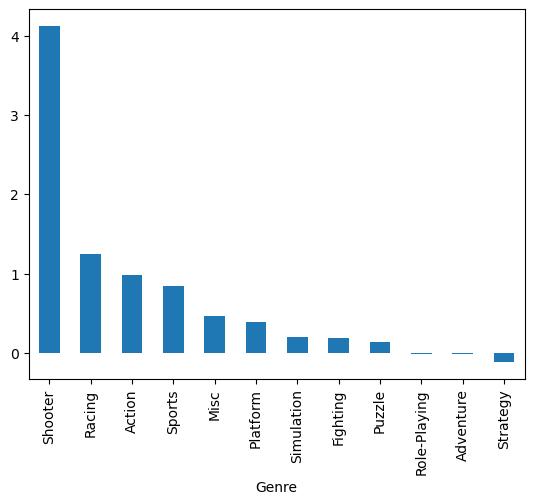

In [96]:
region_growth.plot.bar()

### Estabilidad (Mas cercano a 0 mejor)

In [97]:
# Medir estabilidad (menor desviación estándar = mercado más estable)
stability = df_gro.std(axis=1).sort_values().round(2)
stability.rename('Estabilidad del Crecimiento')


Genre
Action           0.00
Adventure        0.03
Simulation       0.05
Strategy         0.06
Puzzle           0.08
Shooter          0.60
Platform         0.63
Role-Playing     0.81
Fighting         0.83
Misc             1.36
Sports          15.36
Racing            NaN
Name: Estabilidad del Crecimiento, dtype: float64

#

-------------

# Tabla de referencia

In [32]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
